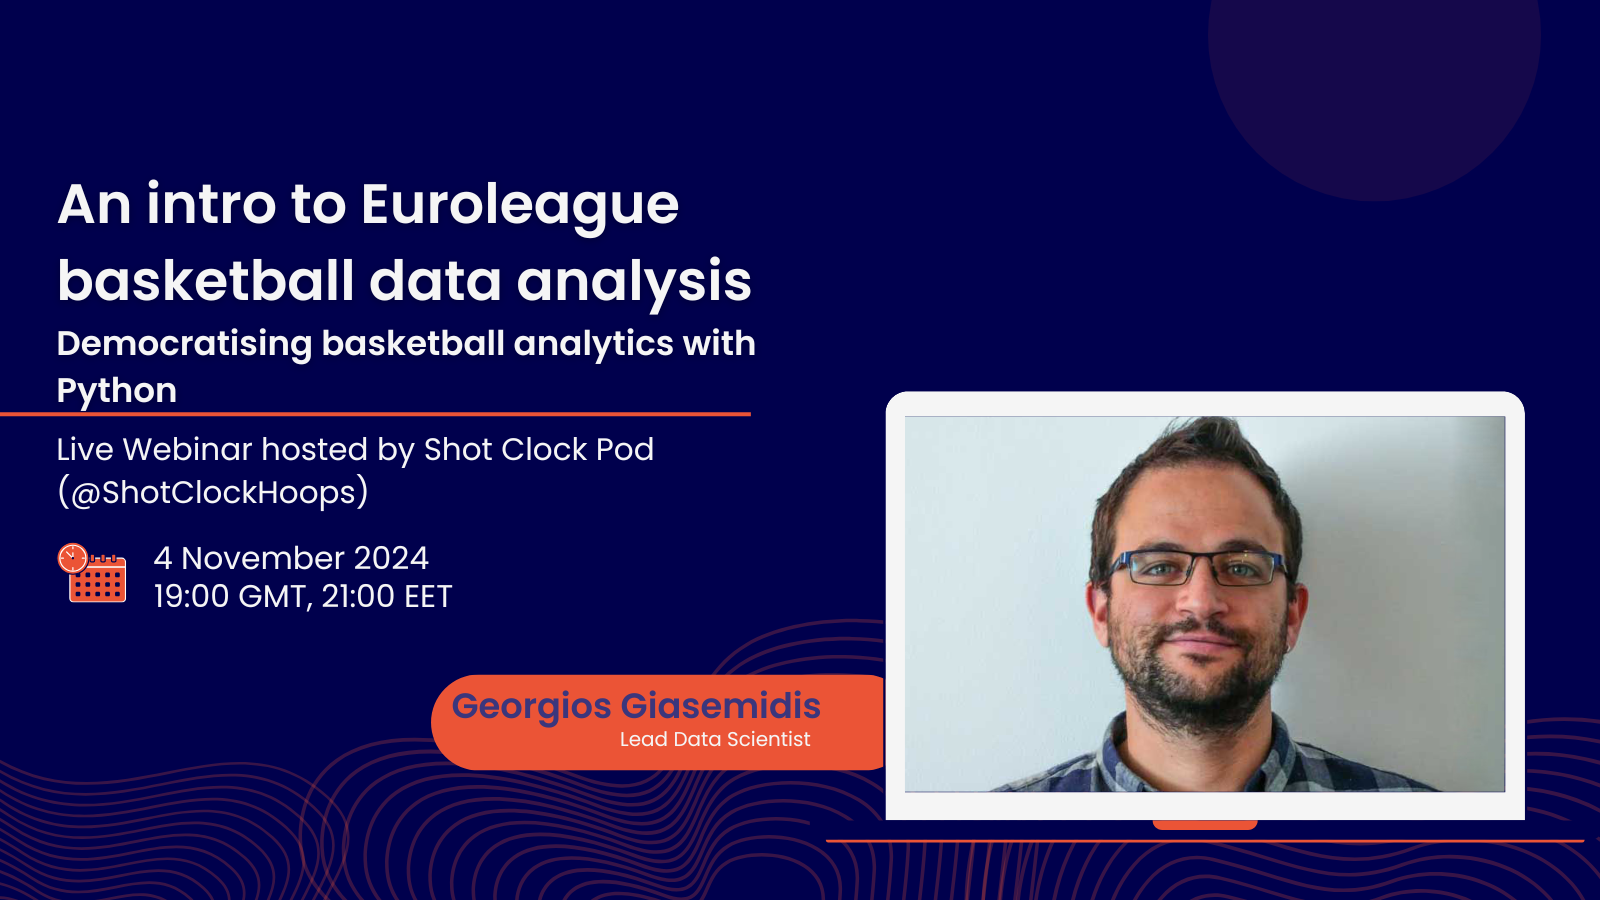

# Resources

* [Github](https://github.com/giasemidis) projects:
  - [euroleague-api](https://github.com/giasemidis/euroleague_api)
  - [Euroleague shooting charts](https://github.com/giasemidis/euroleague-shot-charts)
  - [Basketball data modelling](https://github.com/giasemidis/basketball-data-analysis)
* [Medium](https://medium.com/@g-giasemidis) blogs
  - [Mid-range analysis](https://g-giasemidis.medium.com/mid-range-analysis-of-euroleague-part-ii-bfa6af829cdb)
  - [Euroleague shot charts](https://medium.com/@g-giasemidis/create-euroleague-shot-charts-in-python-7ba4aa574644)
* [Predicting the outcome of Euroleague games](https://arxiv.org/abs/2002.08465) paper
* Contact
  - Twitter: @g_giase
  - [LinkedIn](https://www.linkedin.com/in/ggiasemidis/)
  - email: g.giasemidis@gmail.com
* Collaborations:
  - Shot Clock Pod (@Sh_Cl_Pod)


# Euroleague Resources:

* [euroleague-api documentation](https://pypi.org/project/euroleague-api/)
* [Swagger](https://api-live.euroleague.net/swagger/index.html)




# Install library

In [ ]:
!pip install euroleague-api

In [ ]:
competition = "E"  # use "U" for Eurocup
# season = 2024

# Boxscore data

In [ ]:
from euroleague_api.boxscore_data import BoxScoreData

In [ ]:
boxscoredata = BoxScoreData(competition=competition)

In [ ]:
bxscore_q_df = boxscoredata.get_game_boxscore_quarter_data(season=2024, gamecode=2)

In [ ]:
bxscore_q_df.to_csv("game_code_2_2024.csv")

In [ ]:
bxscore_q_df

In [ ]:
bxscore_stats_df = boxscoredata.get_player_boxscore_stats_data(season=2024, gamecode=2)
bxscore_stats_df.head()

In [ ]:
bxscore_stats_home_df = bxscore_stats_df[bxscore_stats_df["Team"] == "MCO"]
bxscore_stats_away_df = bxscore_stats_df[bxscore_stats_df["Team"] == "MIL"]

In [ ]:
bxscore_stats_home_df

## Boxscore data for entire season or multiple season

In [ ]:
season = 2024

In [ ]:
bxscore_stats_2024_df = boxscoredata.get_player_boxscore_stats_single_season(season=season)

In [ ]:
bxscore_stats_2024_df.head()

In [ ]:
# bxscore_stats_2021_2023_df = boxscoredata.get_player_boxscore_stats_multiple_seasons(start_season=2021, end_season=2023)

# Play by Play data

In [ ]:
from euroleague_api.play_by_play_data import PlayByPlay

In [ ]:
pbp_data = PlayByPlay(competition=competition)

In [ ]:
pbp_data_df = pbp_data.get_game_play_by_play_data(season=2024, gamecode=2)

In [ ]:
pbp_data_df

In [ ]:
pbp_data_df["PLAYTYPE"].unique()

## Play by Play with lineups

In [ ]:
pbp_lineups_df = pbp_data.get_pbp_data_with_lineups(season=season, gamecode=2)
pbp_lineups_df.head()

In [ ]:
pbp_lineups_df["Lineup_MCO"][0]

## Play by Play of all games in a single season or multiple seasons

In [ ]:
pbp_data_2024_df = pbp_data.get_game_play_by_play_data_single_season(season=season)

In [ ]:
pbp_data_2024_df

In [ ]:
# pbp_data_2021_2023_df = pbp_data.get_game_play_by_play_data_multiple_seasons(start_season=2021, end_season=2023)

# Shooting Data

In [ ]:
from euroleague_api.shot_data import ShotData

In [ ]:
shotdata = ShotData(competition=competition)

In [ ]:
shotdata_df = shotdata.get_game_shot_data(season=season, gamecode=2)

In [ ]:
shotdata_df.head()

## Shot data of a single and multiple seasons

In [ ]:
shotdata_s2024_df = shotdata.get_game_shot_data_single_season(season=season)

In [ ]:
# shotdata_s2024_df.to_csv("shotdata_season_2024.csv")
shotdata_s2024_df

In [ ]:
# shotdata_2021_2023_df = shotdata.get_game_shot_data_multiple_seasons(start_season=2021, end_season=2023)

## Analysis

In [ ]:
from matplotlib import pyplot as plt
from matplotlib.patches import Circle, Rectangle, Arc


def draw_court(ax=None, color='black', lw=1, outer_lines=True):
    """
    Function copied from
    https://g-giasemidis.medium.com/create-euroleague-shot-charts-in-python-7ba4aa574644

    FIBA basketball court dimensions:
    https://www.msfsports.com.au/basketball-court-dimensions/
    It seems like the Euroleauge API returns the shooting positions
    in resolution of 1cm x 1cm.
    """
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = plt.gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 45.72cm so it has a radius 45.72/2 cms
    hoop = Circle((0, 0), radius=45.72 / 2, linewidth=lw, color=color,
                  fill=False)

    # Create backboard
    backboard = Rectangle((-90, -157.5 + 120), 180, -1, linewidth=lw,
                          color=color)

    # The paint
    # Create the outer box of the paint
    outer_box = Rectangle((-490 / 2, -157.5), 490, 580, linewidth=lw,
                          color=color, fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-360 / 2, -157.5), 360, 580, linewidth=lw,
                          color=color, fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 580 - 157.5), 360, 360, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 580 - 157.5), 360, 360, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 2 * 125, 2 * 125, theta1=0, theta2=180,
                     linewidth=lw, color=color)

    # Three point line
    # Create the side 3pt lines
    corner_three_a = Rectangle((-750 + 90, -157.5), 0, 305, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((750 - 90, -157.5), 0, 305, linewidth=lw,
                               color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the
    # threes
    three_arc = Arc((0, 0), 2 * 675, 2 * 675, theta1=12, theta2=167.5,
                    linewidth=lw, color=color)

    # Center Court
    center_outer_arc = Arc((0, 1400-157.5), 2 * 180, 2 * 180, theta1=180,
                           theta2=0, linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box,
                      restricted, top_free_throw, bottom_free_throw,
                      corner_three_a, corner_three_b, three_arc,
                      center_outer_arc]
    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-750, -157.5), 1500, 1400, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax


In [ ]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# from draw_court import draw_court


def plot_scatter(made, miss, title=None):
    """
    Scatter plot of made and missed shots
    """
    plt.figure()
    draw_court()
    plt.plot(made['COORD_X'], made['COORD_Y'], 'o', label='Made')
    plt.plot(miss['COORD_X'], miss['COORD_Y'], 'x', markerfacecolor='none',
             label='Missed')
    plt.legend()
    plt.xlim([-800, 800])
    plt.ylim([-200, 1300])
    plt.title(title)
    plt.show()
    return


### Team Shooting Chart

In [ ]:
team = "MAD"
team_shot_df = shotdata_s2024_df[shotdata_s2024_df["TEAM"] == team]

team_shot_miss_df = team_shot_df[team_shot_df["ID_ACTION"].str.contains("FGA")]
team_shot_made_df = team_shot_df[team_shot_df["ID_ACTION"].str.contains("FGM")]
plot_scatter(team_shot_made_df, team_shot_miss_df, title=team)

### Player Shooting Chart

In [ ]:
# shotdata_s2024_df["PLAYER"].unique()

In [ ]:
player_name = "NEDOVIC, NEMANJA"

In [ ]:
player_shot_df = shotdata_s2024_df[shotdata_s2024_df["PLAYER"] == player_name]
player_shot_miss_df = player_shot_df[player_shot_df["ID_ACTION"].str.contains("FGA")]
player_shot_made_df = player_shot_df[player_shot_df["ID_ACTION"].str.contains("FGM")]
plot_scatter(player_shot_made_df, player_shot_miss_df, title=player_name)

# Team Stats

In [ ]:
def get_team_possessions(df):
  """
  https://hackastat.eu/en/learn-a-stat-possessions-and-pace/
  Poss = FGA + 0.44 FTA - OR + TO
  """
  fga = df[["twoPointersAttempted", "threePointersAttempted"]].sum(axis=1)
  fta = df["freeThrowsAttempted"]
  ofr = df["offensiveRebounds"]
  to = df["turnovers"]
  poss = fga + 0.44 * fta - ofr + to
  return poss

In [ ]:
import pandas as pd
pd.options.plotting.backend = "plotly"

In [ ]:
from euroleague_api.team_stats import TeamStats

In [ ]:
teamstats = TeamStats(competition)

In [ ]:
team_stats_2024_df = teamstats.get_team_stats(
    endpoint="opponentsAdvanced",
    params={"SeasonMode": "Single", "SeasonCode": "E2024"},
    # statistic_mode="Accumulated" # PerGame
)

In [ ]:
team_stats_2024_df

In [ ]:
team_stats_2024_df["offensiveReboundsPercentage"] = team_stats_2024_df["offensiveReboundsPercentage"].str.strip("%").astype(float)
team_stats_2024_df["defensiveReboundsPercentage"] = team_stats_2024_df["defensiveReboundsPercentage"].str.strip("%").astype(float)

In [ ]:
team_stats_2024_df.sort_values("offensiveReboundsPercentage").plot.bar(x="team.name", y="offensiveReboundsPercentage")

In [ ]:
team_stats_2024_df.sort_values("defensiveReboundsPercentage").plot.bar(x="team.name", y="defensiveReboundsPercentage")

In [ ]:
fig = team_stats_2024_df.plot.scatter(x="offensiveReboundsPercentage", y="defensiveReboundsPercentage", hover_data=["team.name"])
fig.update_traces(
    mode="markers+text",
    text=team_stats_2024_df["team.name"],
    textposition="top center",
)
fig.show()

In [ ]:
advanced_team_stats_df = teamstats.get_team_advanced_stats_single_game(season=2024, gamecode=2)
advanced_team_stats_df

## Teams' Rating Chart

In [ ]:
team_stats_2024_df = teamstats.get_team_stats(
    endpoint="traditional",
    params={"SeasonMode": "Single", "SeasonCode": "E2024"},
    statistic_mode="Accumulated"
)

team_stats_opps_2024_df = teamstats.get_team_stats(
    endpoint="opponentsTraditional",
    params={"SeasonMode": "Single", "SeasonCode": "E2024"},
    statistic_mode="Accumulated"
)

In [ ]:
team_stats_2024_df["possessions"] = get_team_possessions(team_stats_2024_df)
team_stats_opps_2024_df["possessions"] = get_team_possessions(team_stats_opps_2024_df)

In [ ]:
# team_stats_2024_df

In [ ]:
team_stats_2024_df["OffRtg"] = team_stats_2024_df["pointsScored"] / team_stats_2024_df["possessions"] * 100
team_stats_opps_2024_df["DefRtg"] = team_stats_opps_2024_df["pointsScored"] / team_stats_opps_2024_df["possessions"] * 100
netrtg = team_stats_2024_df[["team.code", "team.name", "team.imageUrl", "OffRtg"]].merge(team_stats_opps_2024_df[["team.code", "team.name", "team.imageUrl", "DefRtg"]])
netrtg["NetRtg"] = netrtg["OffRtg"] - netrtg["DefRtg"]

In [ ]:
fig = netrtg.plot.scatter(x="OffRtg", y="DefRtg", hover_data=["team.name"])
fig.update_traces(
    mode="markers+text",
    text=netrtg["team.name"],
    textposition="top center",
)
fig.update_layout(
    yaxis={"autorange": "reversed", "range": [100, 125]},
    xaxis={"range": [100, 125]},
    width=800,
    height=800
)
fig.add_hline(y=netrtg["DefRtg"].mean(), line_dash="dash")
fig.add_vline(x=netrtg["OffRtg"].mean(), line_dash="dash")
fig.show()

# Player stats

In [ ]:
from euroleague_api.player_stats import PlayerStats

In [ ]:
playerstats = PlayerStats(competition)

In [ ]:
player_stats_2024_df = playerstats.get_player_stats_single_season(season=2024, endpoint="advanced", phase_type_code=None, statistic_mode="PerGame")

In [ ]:
player_stats_2024_df.head()

In [ ]:
player_stats_2024_df.to_csv("player_stats_2024.csv")

In [ ]:
player_stats_2024_df["trueShootingPercentage"] = player_stats_2024_df["trueShootingPercentage"].str.strip("%").astype(float)

In [ ]:
player_stats_2024_df.sort_values("trueShootingPercentage", ascending=False).head(20).plot.bar(x="player.name", y="trueShootingPercentage")

In [ ]:
player_stats_2024_df.columns

In [ ]:
mask = player_stats_2024_df["minutesPlayed"] > 20
player_stats_2024_df[mask].sort_values("trueShootingPercentage", ascending=False).head(20).plot.bar(x="player.name", y="trueShootingPercentage")

In [ ]:
# player_stats_2024_df["effectiveFieldGoalPercentage"] = player_stats_2024_df["effectiveFieldGoalPercentage"].str.strip("%").astype(float)
# player_stats_2024_df["assistsToTurnoversRatio"] = player_stats_2024_df["assistsToTurnoversRatio"].str.strip("%").astype(float)
# player_stats_2024_df["threePointAttemptsRatio"] = player_stats_2024_df["threePointAttemptsRatio"].str.strip("%").astype(float)
# player_stats_2024_df["assistsRatio"] = player_stats_2024_df["assistsRatio"].str.strip("%").astype(float)

In [ ]:
player_stats_2024_df[mask].plot.scatter(x="effectiveFieldGoalPercentage", y="assistsRatio", hover_data=["player.name"])